# RPA Workshop 1 - 개인 별 수행

1. 2008.csv 파일을 데이터프레임으로 읽으세요.
- https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

2. 해당 데이터는 미국 내 항공 기록입니다 (2008년)

3. Orig와 Dest는 각각 출발지 및 도착지 공항 코드입니다.

4. 위의 데이터프레임에 대해서 다음 내용을 수행하세요.

- 데이터프레임에 대한 결측치 조사

- Dest 공항 코드의 고유한 값별로 빈도 조사

- (선택) Orig와 Dest 값으로 Group By하여 도착 지연 시간의 평균 계산

- flight라는 폴더 만든 후 WD로 지정

- 전체 데이터프레임을 Dest 공항 코드별로 나눠서 엑셀 저장: 공항코드.xlsx 형태



In [12]:
import pandas as pd
df = pd.read_csv('2008.csv')

In [ ]:
df.isnull().sum()

In [79]:
df.Dest.value_counts().index

Index(['LAS', 'MDW', 'PHX', 'BWI', 'OAK', 'HOU', 'DAL', 'LAX', 'MCO', 'SAN',
       'TPA', 'BNA', 'SMF', 'SJC', 'STL', 'MCI', 'ABQ', 'PHL', 'BUR', 'DEN',
       'ONT', 'SLC', 'AUS', 'SEA', 'SAT', 'FLL', 'PDX', 'RNO', 'SNA', 'MSY',
       'PVD', 'ELP', 'RDU', 'MHT', 'CMH', 'ISP', 'BHM', 'SFO', 'PIT', 'JAX',
       'OKC', 'TUS', 'DTW', 'SDF', 'TUL', 'BOI', 'BDL', 'CLE', 'BUF', 'IND',
       'GEG', 'OMA', 'ALB', 'LIT', 'ORF', 'PBI', 'LBB', 'MAF', 'RSW', 'AMA',
       'IAD', 'HRL', 'JAN', 'CRP'],
      dtype='object')

In [43]:
df1 = df.groupby(['Origin', 'Dest'])['ArrDelay'].mean()

In [36]:
import os
os.chdir('flight')

In [77]:
list1 = list(df.Dest.value_counts().index)

for i in list1 :
  df2 = df[df.Dest == i]
  df2.to_excel(i+'.xlsx')




# RPA Workshop 2 - 같은 기관에서 오신 경우 / 관심사가 갖으신 경우 팀으로 수행하셔도 됩니다.

1. 공공데이터포털 또는 AI허브 등에서 관심을 갖는 분야에 대한 표 형태의 엑셀이나 CSV인 경우 행정 데이터를 찾으세요.
- 예: 00현황, 00민원 등에 대한 데이터
- 관심 분야를 찾기 어려우신 경우 첨부된 데이터 들을 확인해보세요.

2. 해당 데이터를 다운로드한 후, 데이터 프레임으로 읽어 보세요.

3. 해당 데이터와 관련된 주요 키워드를 도출한 후, 관련 뉴스를 수집하세요.

4. 수집된 뉴스에서 적정한 개수의 토픽을 발견하세요.

- ***1부터 4의 내용을 학습하신 코드를 이용해서 워드로 만들어서 다운로드 하세요***
- ***워크숍 종료 후 PDF를 공유하는 발표를 진행할 예정입니다***

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/content')


In [3]:
tax = pd.read_csv('주민1인당지방세부담액.csv')

In [6]:
tax

회계연도 지역명   자치단체코드  자치단체명  주민1인당 지방세부담액(천원)     지방세액(천원)   인구수(명)
0    2023  서울  1100000   서울본청              2639  24881784000  9428372
1    2023  서울  1111000  서울종로구              1150    162516293   141379
2    2023  서울  1112000   서울중구              1795    216236628   120437
3    2023  서울  1113000  서울용산구               877    191690000   218650
4    2023  서울  1114000  서울성동구               586    164651401   281000
..    ...  ..      ...    ...               ...          ...      ...
238  2023  경남  4877000  경남산청군               958     32600000    34028
239  2023  경남  4878000  경남함양군               869     32778494    37708
240  2023  경남  4879000  경남거창군               683     41246472    60387
241  2023  경남  4880000  경남합천군               845     35604071    42142
242  2023  제주  4900000   제주본청              2761   1872600000   678159

[243 rows x 7 columns]

In [26]:
!apt-get update -qq   # 폰트 설정을 위한 코드
!apt-get install fonts-nanum* -qq

<Axes: xlabel='자치단체명', ylabel='주민1인당 지방세부담액(천원)'>

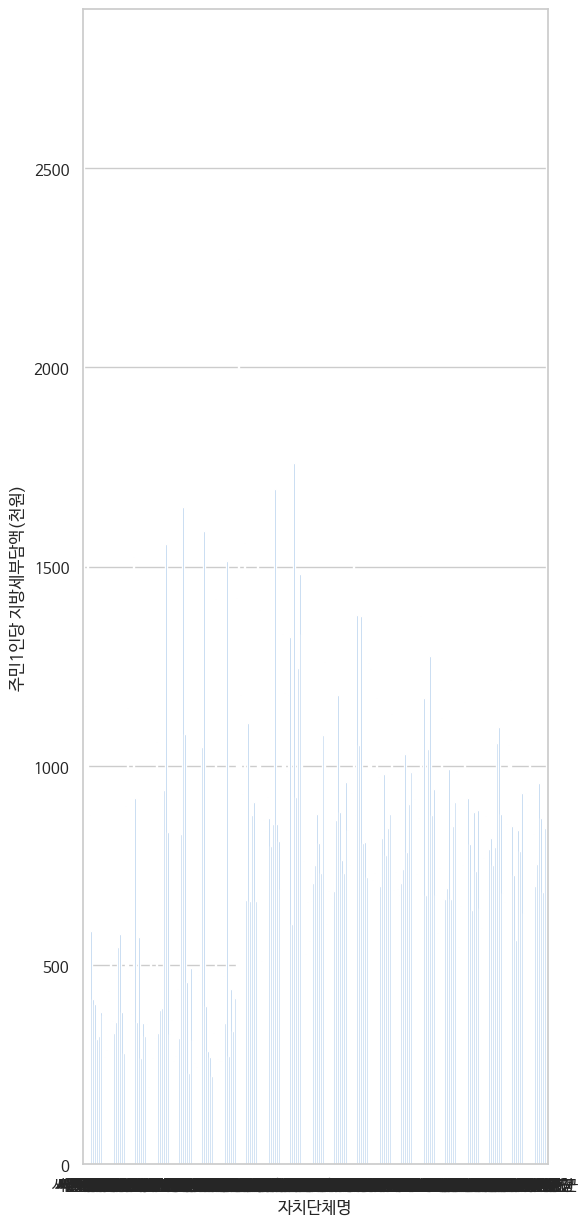

In [15]:
sns.set_theme(style="whitegrid")
plt.rc('font', family='NanumBarunGothic')
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="자치단체명", y="주민1인당 지방세부담액(천원)", data=tax,
            label="Total", color="b")

In [12]:
tax_1 = tax.groupby(['지역명'])['지방세액(천원)','인구수(명)'].sum()
tax_1['1인당 지방세액(천원)'] = tax_1['지방세액(천원)'] / tax_1['인구수(명)']

<ipython-input-12-e8ecc4401ba2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tax_1 = tax.groupby(['지역명'])['지방세액(천원)','인구수(명)'].sum()


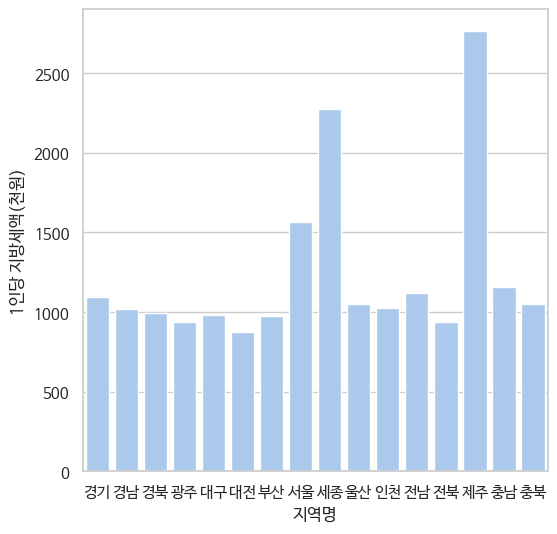

In [70]:
sns.set_theme(style="whitegrid")
plt.rc('font', family='NanumBarunGothic')
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x=tax_1.index, y='1인당 지방세액(천원)', data=tax_1, color="b")
plt.savefig("image1.jpg")

In [56]:
from bs4 import BeautifulSoup
from urllib import parse
import requests
import urllib.request
import numpy as np
import pandas as pd
import time

#----------------------------------------------#
#변경할 부분
startdate = "2023.06.01"
enddate = "2023.06.23"
searchword ="지방세"#검색어
#----------------------------------------------#

base_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query"+parse.urlencode([('',searchword)], doseq=True)+"&sort=1&photo=3&field=0&pd=3&ds="+startdate+"&de="+enddate+"&mynews=1&office_type=0&office_section_code=0&news_office_checked=&nso=so:dd,p:from"+startdate.replace(".", "")+"to"+enddate.replace(".", "")+",a:all&mynews=0&start="
titles = [ ]
urls = [ ]
i=1

while True:
 try:
    time.sleep(0.45)
    url = base_url+str(i)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    t_news = soup.select('a.news_tit')  # 클래스 표시(a태그 안에 class가 news_tit인 것에 대해서 가져옴)
    t_len = len(t_news)

    if t_len <1:
        break

    for j in np.arange(t_len)+1:
            try:
                titles.append(soup.select('a.news_tit')[j].text)
                urls.append(soup.select('a.info')[j]['href'])
            except Exception as e:
                continue
    i=i+10

 except Exception as e:
    continue

result = pd.DataFrame({"Url": urls, "Title":titles})
result.Url[0]

'https://n.news.naver.com/mnews/article/020/0003505266?sid=101'

In [57]:
articles = []
dates = []

for i in result.Url:
   try:
    if( "news.naver.com" in i ): #바뀐곳
     print(i)
     time.sleep(0.45)
     html = urllib.request.urlopen(i).read()
     soup = BeautifulSoup(html, 'html.parser')

     news = soup.select('div#dic_area')[0].text #id #, class.
     news_date = soup.select('span.media_end_head_info_datestamp_time._ARTICLE_DATE_TIME')[0].text  #네이버 뉴스의 날짜 시간 부분 지정

     articles.append(news)
     dates.append(news_date.split()[0])

   except Exception as e:
    print(e)
    continue


https://n.news.naver.com/mnews/article/020/0003505266?sid=101
https://n.news.naver.com/mnews/article/656/0000054781?sid=102
https://n.news.naver.com/mnews/article/029/0002808771?sid=101
https://n.news.naver.com/mnews/article/088/0000821233?sid=004
https://n.news.naver.com/mnews/article/011/0004204978?sid=101
https://n.news.naver.com/mnews/article/029/0002808465?sid=101
https://n.news.naver.com/mnews/article/016/0002159133?sid=102
https://n.news.naver.com/mnews/article/023/0003770942?sid=100
https://n.news.naver.com/mnews/article/277/0005274933?sid=101
https://n.news.naver.com/mnews/article/005/0001617211?sid=101
https://n.news.naver.com/mnews/article/087/0000977493?sid=100
https://n.news.naver.com/mnews/article/656/0000054215?sid=110
https://n.news.naver.com/mnews/article/015/0004857349?sid=101
https://n.news.naver.com/mnews/article/087/0000977350?sid=102
https://n.news.naver.com/mnews/article/087/0000977275?sid=102
https://n.news.naver.com/mnews/article/022/0003823101?sid=102
https://

In [58]:
# 수집된 내용을 표로 정리하기, news컬럼, date컬럼, likes컬럼
df = pd.DataFrame({'news':articles, 'date':dates})

50

In [59]:
!pip install konlpy
!pip install tqdm #진행상태를 알려주는 기능 제공

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt, Kkma
from tqdm import tqdm

print(df.isnull().values.any()) #null값이 있는지 체크
train_data = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

train_data['news'] = train_data['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글이 아닌 값을 지우라는 뜻.(ㄱ-ㅎㅏ-ㅣ가-힣 : 한글,  ^ : 아닌 값)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
False
False


<ipython-input-59-663777d93bc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['news'] = train_data['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글이 아닌 값을 지우라는 뜻.(ㄱ-ㅎㅏ-ㅣ가-힣 : 한글,  ^ : 아닌 값)


In [60]:
train_data.shape
train_data.news[0]


'빌라는 안심전세 앱서 시세 확인저렴한 집은 불법무허가 가능성체납세금 있으면 계약 무효 특약도전세사기 여파가 전국으로 확산하고 전셋값이 큰 폭으로 떨어지면서 집주인이 전세 보증금을 돌려주지 못하는 역전세난이 기승을 부리고 있습니다 전세 매물을 찾는 예비 세입자들의 입장에서는 전세 계약 체결하기가 무섭다는 말이 절로 나올 수 있는 상황입니다 부동산 빨간펜에도 비슷한 고민을 하는 독자분들의 질문이 많았습니다 이번 빨간펜에서는 전세 매물을 찾고 계약하는 과정에서 보증금을 안전하게 지킬 수 있는 방법을 알아보겠습니다  전세 매물을 알아보고 있습니다 어떤 매물이 안전한지 확신이 없는데 어떻게 해야 할까요 첫 단계는 전셋값과 매매가격을 정확하게 파악하는 것입니다 하지만 빌라는 거래가 자주 발생하지 않는 탓에 현재 시점의 적정 가격을 알아보는 것이 쉽지 않죠 이때 안심전세 앱애플리케이션을 활용할 수 있습니다 안심전세 앱은 수도권 연립다세대주택빌라뿐만 아니라 전국의 오피스텔 및 대형 아파트까지 주택 만 채의 시세를 제공하고 있습니다  시세 외에도 본인이 찾은 매물의 전셋값이 적정한 수준인지도 알려줍니다 선순위 권리관계 근저당 전세 보증금 등을 추가 입력하면 전세 계약이 안전한지 진단 결과를 확인할 수 있습니다 해당 주택 인근의 평균 전세가율을 근거로 적정 전세 보증금 수준도 제시해 줍니다 해당 주택이 주택도시보증공사의 전세보증금반환보증보험에 가입 가능한지도 알 수 있습니다  계약서를 쓰기 전 반드시 확인해야 할 것들이 있나요 주택 상태도 중요합니다 집 내부를 꼼꼼히 살피면서 하자는 없는지 집주인에게 수리를 요청해야 할 것은 무엇인지를 파악해야 하죠 빌라라면 건축물대장을 통해 불법무허가 주택이 아닌지 확인해 보는 것이 좋습니다 주변 전세 시세와 비슷한 매물인데 방이 하나 더 있다거나 같은 면적인데 전셋값이 저렴할 경우에는 특히 더 의심해 봐야 합니다 불법무허가 주택인 경우 주택임대차보호법의 적용을 받지 못합니다 전세 대출은 물론이고  전세보증보험 가입도 불가능합니다 등기부등본

In [66]:
#값을 저장할 비어있는 리스트를 만듬.
tokenized_data = []

# 불용어 정의
stopwords = ['을', '등', '것', '년', '수', '분기','위','해','월','일',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나','그', '투', '등에', '후','서','로',
             '중', '대', '원', '개','시','내','군','만','김','명','간','만큼','곳']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Kkma() # Kkma() : 명사만 출력함. 성능이 좋은 대신 속도가 느림. Okt() : 시간이 빠른 대신 성능이 좋지 않음.

for sentence in tqdm(train_data['news']): #리뷰 각각에 대해서 아래작업 반복
    tokenized_sentence = okt.nouns(sentence)  #각 리뷰에서 명사만 뽑아서 리스트
    #위에서 명사만 추출한 결과에서, 각 명사가 stopwords인지 체크하고
    #stopwords 아닌 명사만 사용함
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

len(tokenized_data)

100%|██████████| 50/50 [00:48<00:00,  1.03it/s]


50

In [75]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_data) #사전 구성
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

import gensim
NUM_TOPICS = 4 # 토픽의 개수를 5개로 설정함.
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS,
                                           id2word=dictionary, passes=15)

#각 토픽의 출현확률이 높은 단어를 지정된 갯수만큼 반환
topics = ldamodel.print_topics(num_words=10)

#위 내용을 출력
for topic in topics:
    print(topic)

(0, '0.003*"지방세" + 0.003*"지역" + 0.002*"강원" + 0.002*"지원" + 0.002*"정부" + 0.002*"경제" + 0.002*"억" + 0.002*"사업" + 0.002*"지자체" + 0.002*"계획"')
(1, '0.003*"지방세" + 0.002*"센터" + 0.002*"가능" + 0.002*"관련" + 0.002*"내용" + 0.002*"체납" + 0.002*"기준" + 0.002*"억" + 0.002*"대상" + 0.002*"제공"')
(2, '0.003*"지방세" + 0.002*"이상" + 0.002*"시장" + 0.002*"제도" + 0.002*"부여" + 0.002*"정부" + 0.002*"필요" + 0.002*"경제" + 0.002*"지방" + 0.002*"이하"')
(3, '0.004*"지방세" + 0.003*"지방" + 0.002*"구" + 0.002*"올해" + 0.002*"지난해" + 0.002*"서울" + 0.002*"경우" + 0.002*"포함" + 0.002*"부과" + 0.002*"대상"')
(4, '0.004*"지방세" + 0.003*"지원" + 0.003*"강원" + 0.002*"억" + 0.002*"지역" + 0.002*"지방" + 0.002*"자치" + 0.002*"경우" + 0.002*"시행" + 0.002*"한국"')


In [71]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184491 sha256=f5e22d0531dd64f92cfa6807083421be6b140acdeb4206bba493769a8c84eb32
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


In [82]:
from docx import Document

doc = Document()
#스타일 적용하기 (일반 텍스트, 글꼴은 ‘맑은고딕체’)
from docx.oxml.ns import qn
style = doc.styles['Normal']
style.font.name =  '맑은 고딕'
style._element.rPr.rFonts.set(qn('w:eastAsia'), '맑은 고딕')

#제목 넣기
doc.add_heading('워크샵 보고서, H1', level=1) #level: 0~6

#문단 넣기
doc.add_paragraph()
doc.paragraphs[0].text = "워크샵 2번 문제"

doc.add_paragraph()
doc.paragraphs[1].text = "1. 데이터셋 이름:  주민 1인당 지방세 부담액"

doc.add_paragraph()
doc.paragraphs[2].text = "2. 데이터셋 컬럼 정보:  회계연도, 지역명, 자치단체코드, 자치단체명, 주민1인당 지방세부담액, 지방세액, 인구수"

doc.add_paragraph()
doc.paragraphs[3].text = "3. 주요 키워드: 지방세"

doc.add_paragraph()
doc.paragraphs[4].text = "4. 수집된 뉴스 건수: 50건"

doc.add_paragraph()
doc.paragraphs[5].text = "5. 토픽 개수: 5"

doc.add_paragraph()
doc.paragraphs[6].text = "6. 토픽 "

#이미지 추가
doc.add_picture('image1.jpg')

#표 추가
table = doc.add_table(rows = 5, cols = 2)
table.style = doc.styles['Table Grid']  #기본 스타일

#표 내용 채우기

#첫 행
row1 = table.rows[0].cells
# 첫 행의 각 열들에 접근해서 값 입력
row1[0].text = '토픽1'
row1[1].text = '정부의 지자체 경제 사업 지원'

#두번째 행
row2 = table.rows[1].cells
# 두번째 행의 각 열들에 접근해서 값 입력
row2[0].text = '토픽2'
row2[1].text = '체납 대상에게 관련 내용 제공.'

#세번째 행
row3 = table.rows[2].cells
# 두번째 행의 각 열들에 접근해서 값 입력
row3[0].text = '토픽3'
row3[1].text = '지방세 제도 필요 '

#세번째 행
row3 = table.rows[3].cells
# 두번째 행의 각 열들에 접근해서 값 입력
row3[0].text = '토픽4'
row3[1].text = '지방세, 올해 지난해 ... 부과'

#세번째 행
row3 = table.rows[4].cells
# 두번째 행의 각 열들에 접근해서 값 입력
row3[0].text = '토픽5'
row3[1].text = '지방세, 강원도 자치단체 지원 시행'


#저장
doc.save('테스트.docx')